In [1]:
! pip install chromadb langchain pypdf tqdm umap-learn sentence_transformers plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.6 MB/s eta

In [ ]:
! pip uninstall umap

In [3]:
from helper_utils import load_chroma, word_wrap
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

chroma_collection = load_chroma(filename='/content/microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

349

In [ ]:
type(chroma_collection)

chromadb.api.models.Collection.Collection

In [7]:
query = "What is the total revenue?" #original query

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'] #not "results['documents'][0]"
retrieved_documents

[['revenue, classified by significant product and service offerings, was as follows : ( in millions ) year ended june 30, 2022 2021 2020 server products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22, 488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8, 077 search and news advertising 11, 591 9, 267 8, 524 enterprise services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291 4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast certain previously reported amounts in the table above to conform to the way we internally manage and monitor our business.',
  '74 note 13 — unearned revenue unearned revenue by segment was as follows : ( in millions ) june 30, 2022 2021 productivity and business processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in unearned revenue were as follows : ( in

In [11]:
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)
unique_documents

{'74 note 13 — unearned revenue unearned revenue by segment was as follows : ( in millions ) june 30, 2022 2021 productivity and business processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in unearned revenue were as follows : ( in millions ) year ended june 30, 2022 balance, beginning of period $ 44, 141 deferral of revenue 110, 455 recognition of unearned revenue ( 106, 188 ) balance, end of period $ 48, 408 revenue allocated to remaining performance obligations, which includes unearned revenue and amounts that will be invoiced and recognized as revenue in future periods, was $ 193 billion as of june 30, 2022, of which $ 189 billion is related to the commercial portion of revenue. we expect to recognize approximately 45 % of this revenue over the next 12',
 '82 in addition, certain costs incurred at a corporate level that are identifiable and that benefit our segments are allocated to them. these all

In [ ]:
chroma_collection.get(include = ['embeddings'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
chroma_collection.get(include = ['embeddings'])['embeddings']

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
chroma_collection.get(include = ['documents'])['documents'][0]

'1 dear shareholders, colleagues, customers, and partners : we are living through a period of historic economic, societal, and geopolitical change. the world in 2022 looks nothing like the world in 2019. as i write this, inflation is at a 40 - year high, supply chains are stretched, and the war in ukraine is ongoing. at the same time, we are entering a technological era with the potential to power awesome advancements across every sector of our economy and society. as the world ’ s largest software company, this places us at a historic intersection of opportunity and responsibility to the world around us. our mission to empower every person and every organization on the planet to achieve more has never been more urgent or more necessary. for all the uncertainty in the world, one thing is clear : people and organizations in every industry are increasingly looking to digital technology to overcome today ’ s challenges and emerge stronger. and no'

**visualize the embedding space**

> one thing that I personally find useful
> is to visualize the embedding space. Remember that embeddings
> and their vectors are a geometric data structure and you can reason
> about them spatially.

About UMAP

>UMAP is **Uniform Manifold Approximation**, and it's an open source library
>that you can use exactly for projecting high dimensional
>data down into two dimensions or three dimensions so
>that you can visualize it.

One thing unique for UMAP

> UMAP explicitly
> tries to preserve the structure of the data in
> terms of the distances between points as much as it can, unlike
> for example, PCA, which just tries to find the dominant directions and
> project data down in that way.

In [ ]:
import umap.umap_ as umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
documents = chroma_collection.get(include=['documents'])['documents']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

In [ ]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

#save projected_dataset_embeddings
np.save('projected_dataset_embeddings.npy', projected_dataset_embeddings)

100%|██████████| 349/349 [03:57<00:00,  1.47it/s]


In [ ]:
projected_dataset_embeddings[1][0]

3.0926432609558105

In [ ]:
def truncate_text(text, max_words=20):
    """
    Truncates the text to a maximum of max_words.

    :param text: The original text.
    :param max_words: The maximum number of words to include in the truncated text.
    :return: A truncated version of the text.
    """
    words = text.split()  # Split the text into words
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + '...'  # Join and return the first max_words words
    return text  # Return the original text if it's short enough

In [ ]:
# 3*349 dimension array, column0 is doc and column1&2 are projected embeddings
projected_embeddings_docs = np.empty((len(embeddings),3), dtype=object)

for i in range(len(embeddings)):
    projected_embeddings_docs[i] = [truncate_text(documents[i]), projected_dataset_embeddings[i][0], projected_dataset_embeddings[i][1]]

np.save('projected_embeddings_docs.npy', projected_embeddings_docs)

In [ ]:
#load projected_dataset_embeddings
#projected_dataset_embeddings = np.load('projected_dataset_embeddings.npy')
#projected_embeddings_docs = np.load('projected_embeddings_docs.npy')

(-3.6648513197898867,
 5.9209121584892275,
 -0.4305501949973405,
 8.502051880303771)

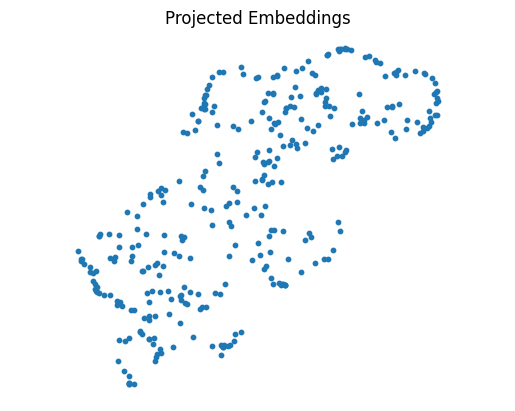

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

A little bit more
advanced visualization would allow you to sort of
**hover over each of these dots and see what's actually in there**

and
you would see that things with similar meanings end up next to
each other even in the projection.
Sometimes they're a little bit unusual structures because a two-dimensional projection
cannot represent all of the structure of the higher
dimensional space. But as I said, it is
useful for visualization.

In [ ]:
import plotly.express as px
import pandas as pd

#content 是每个点的标签或句子
df = pd.DataFrame(projected_embeddings_docs, columns=['content', 'x', 'y'])

fig = px.scatter(df, x='x', y='y', hover_data=['content'])
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))
fig.update_layout(title='Projected Embeddings',
                  xaxis_visible=False, yaxis_visible=False,
                  xaxis_showgrid=False, yaxis_showgrid=False)
fig.show()

可能的工程化：

- 就是这个可视化向量图，出现在st app中
- st app中还有另一部分，就是书的大纲【分节显示，需要大纲算法】
- 检索到的文案，通过文本精确匹配【需要算法】，找到文本，并对应到书的大纲中

In [ ]:
query = "What is the total revenue?" #original query

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(word_wrap(document))
    print('')

revenue, classified by significant product and service offerings, was
as follows : ( in millions ) year ended june 30, 2022 2021 2020 server
products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office
products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22,
488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8,
077 search and news advertising 11, 591 9, 267 8, 524 enterprise
services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291
4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast
certain previously reported amounts in the table above to conform to
the way we internally manage and monitor our business.

74 note 13 — unearned revenue unearned revenue by segment was as
follows : ( in millions ) june 30, 2022 2021 productivity and business
processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more
personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in
unearned revenue were as follows : ( in millio

In [ ]:
type(results['documents'])

list

In [ ]:
type(results['documents'][0])

list

In [ ]:
results['documents'][0]

['revenue, classified by significant product and service offerings, was as follows : ( in millions ) year ended june 30, 2022 2021 2020 server products and cloud services $ 67, 321 $ 52, 589 $ 41, 379 office products and cloud services 44, 862 39, 872 35, 316 windows 24, 761 22, 488 21, 510 gaming 16, 230 15, 370 11, 575 linkedin 13, 816 10, 289 8, 077 search and news advertising 11, 591 9, 267 8, 524 enterprise services 7, 407 6, 943 6, 409 devices 6, 991 6, 791 6, 457 other 5, 291 4, 479 3, 768 total $ 198, 270 $ 168, 088 $ 143, 015 we have recast certain previously reported amounts in the table above to conform to the way we internally manage and monitor our business.',
 '74 note 13 — unearned revenue unearned revenue by segment was as follows : ( in millions ) june 30, 2022 2021 productivity and business processes $ 24, 558 $ 22, 120 intelligent cloud 19, 371 17, 710 more personal computing 4, 479 4, 311 total $ 48, 408 $ 44, 141 changes in unearned revenue were as follows : ( in m

Then: we visualize these retrieved queries

In [ ]:
#firstly, get and project each retrieved embeddings

query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


(-3.6648513197898867,
 5.9209121584892275,
 -0.4305501949973405,
 8.502051880303771)

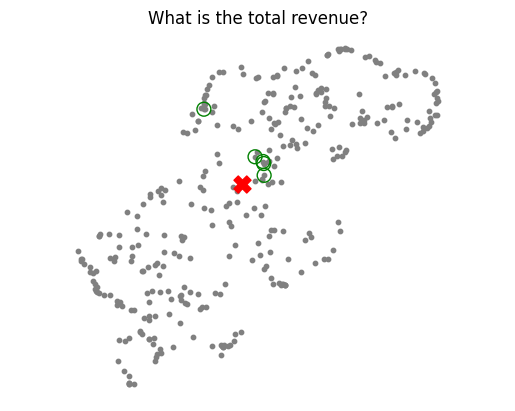

In [ ]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

⬆️ red X is the query question
and green circles are embeddings

(looks not like they're nearest neighbours, because we're trying to squash down the high dimensional vectors

```python
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')
```

这段代码使用了 Matplotlib 库来绘制一个散点图，展示在嵌入空间中的查询和检索到的文档的投影。下面我会逐行解释这段代码的作用：

1. `plt.figure()`：创建一个新的图形窗口。

2. `plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')`：在图形窗口中绘制数据集嵌入的散点图。这里 `projected_dataset_embeddings[:, 0]` 和 `projected_dataset_embeddings[:, 1]` 分别代表嵌入点的 x 和 y 坐标。`s=10` 设置散点的大小为 10，`color='gray'` 设置散点的颜色为灰色。

3. `plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')`：在相同的图形窗口中绘制查询点的散点图。`projected_query_embedding[:, 0]` 和 `projected_query_embedding[:, 1]` 分别代表查询点的 x 和 y 坐标。`s=150` 设置散点的大小为 150，`marker='X'` 设置散点的标记样式为 'X'，`color='r'` 设置散点的颜色为红色。

4. `plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')`：在相同的图形窗口中绘制检索到的文档点的散点图。`projected_retrieved_embeddings[:, 0]` 和 `projected_retrieved_embeddings[:, 1]` 分别代表检索到的文档点的 x 和 y 坐标。`s=100` 设置散点的大小为 100，`facecolors='none'` 设置散点内部颜色为空（即透明），`edgecolors='g'` 设置散点的边缘颜色为绿色。

5. `plt.gca().set_aspect('equal', 'datalim')`：获取当前的坐标轴（Axes 对象），并设置它的长宽比为自动，以确保 x 轴和 y 轴的单位比例相同，使得图形不会因为坐标轴范围的不同而看起来被拉伸。

6. `plt.title(f'{query}')`：设置图形的标题为查询变量 `query` 的值。

7. `plt.axis('off')`：关闭坐标轴，这意味着在图形中不显示 x 轴和 y 轴的刻度和标签。

总的来说，这段代码通过不同颜色和标记的散点图展示了在嵌入空间中查询点、数据集中的点和检索到的文档点的位置，以此来直观地表示查询和检索结果的关系。